In [59]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [60]:
n = 3  # Number of qubits
N = 2 ** n
solution = '011'  # Marked element (the "needle")

In [61]:
def grover_oracle(n, solution):
    qc = QuantumCircuit(n)
    for qubit, bit in enumerate(reversed(solution)):
        if bit == '0':
            qc.x(qubit)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # Multi-controlled X (Toffoli)
    qc.h(n - 1)
    for qubit, bit in enumerate(reversed(solution)):
        if bit == '0':
            qc.x(qubit)
    oracle_gate = qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

In [62]:
def grover_diffuser(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1) # Multi-controlled X (Toffoli)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))
    diffuser_gate = qc.to_gate()
    diffuser_gate.name = "Diffuser"
    return diffuser_gate

In [63]:
iterations = int(np.floor((np.pi*1.0) / 4 * np.sqrt(N)))
print(f'Number of Grover iterations: {iterations}')


Number of Grover iterations: 2


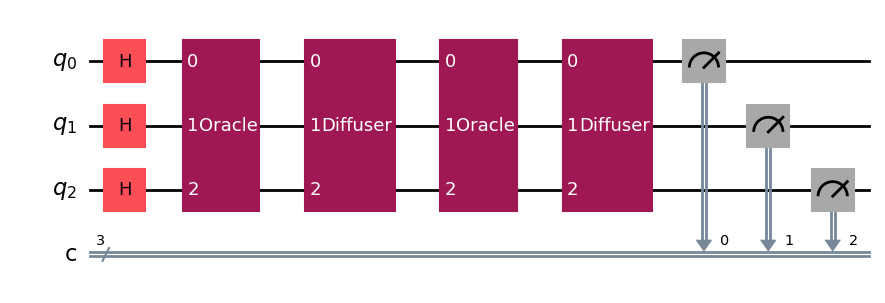

In [64]:
qc = QuantumCircuit(n, n)

# Step 1: Apply Hadamard to all qubits to create superposition
qc.h(range(n))

# Step 2: Apply Grover iterations
oracle = grover_oracle(n, solution)
diffuser = grover_diffuser(n)

for _ in range(iterations):
    qc.append(oracle, range(n))
    qc.append(diffuser, range(n))

# Step 3: Measurement
qc.measure(range(n), range(n))

qc.draw('mpl')

{'011': 1934, '110': 17, '001': 17, '101': 19, '111': 19, '000': 15, '100': 15, '010': 12}


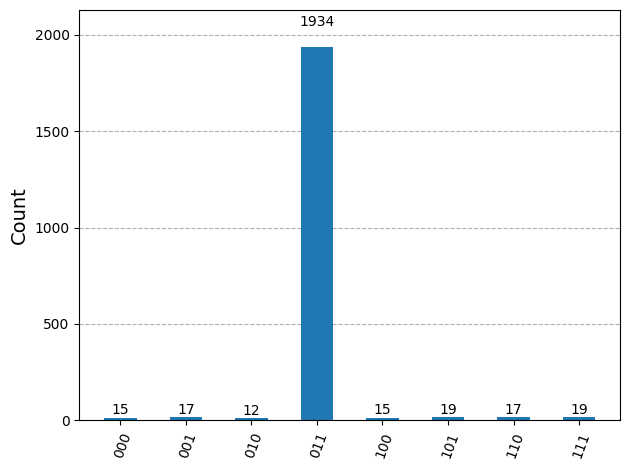

In [65]:
from qiskit import transpile

backend = AerSimulator()
shots = 2048

# Transpile the circuit to the backend's basis gates
transpiled_qc = transpile(qc, backend)

result = backend.run(transpiled_qc, shots=shots).result()
counts = result.get_counts(transpiled_qc)
print(counts)
plot_histogram(counts)